In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
df_city = pd.read_csv('City_with_geopoint.csv')

In [3]:
with open("city_cluster.pkl", "rb") as f:
    city_cluster = pickle.load(f)

In [4]:
df_city['cluster'] = city_cluster.predict(df_city[['Latitude', 'Longitude']])


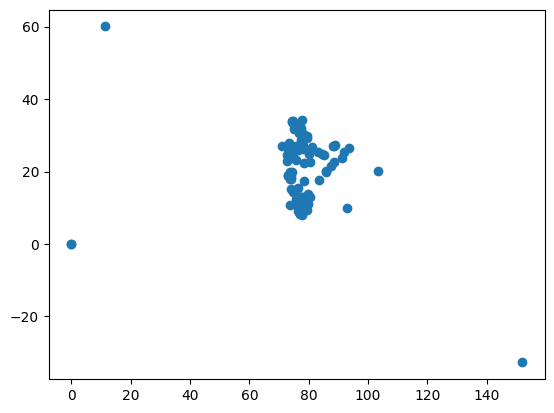

In [7]:
plt.scatter(x=df_city['Longitude'], y=df_city['Latitude'])
plt.show()

AttributeError: 'MeanShift' object has no attribute 'centers_'

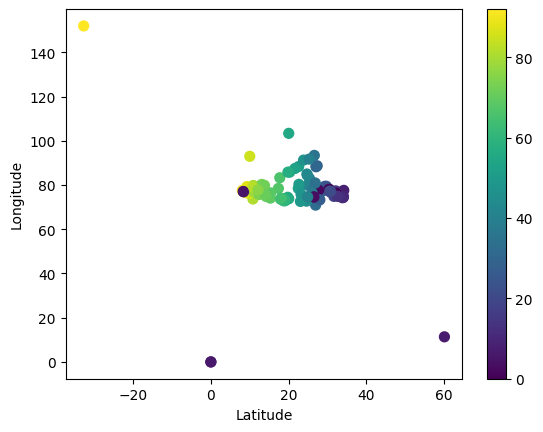

In [8]:
df_city.plot.scatter(x = 'Latitude', y = 'Longitude', c=city_cluster.labels_, s=50, cmap='viridis')
plt.scatter(city_cluster.centers_[:, 0], city_cluster.centers_[:, 1], c='black', s=200, alpha=0.5)

In [6]:
df_city.to_csv('City_with_cluster.csv', index=False)

----

In [18]:
df_restaurant = pd.read_csv('swiggy_with_geopoint.csv')

In [19]:
with open("restaurant_cluster.pkl", "rb") as f:
    restaurant_cluster = pickle.load(f)

In [20]:
df_restaurant['cluster'] = restaurant_cluster.predict(df_restaurant[['Latitude', 'Longitude']])

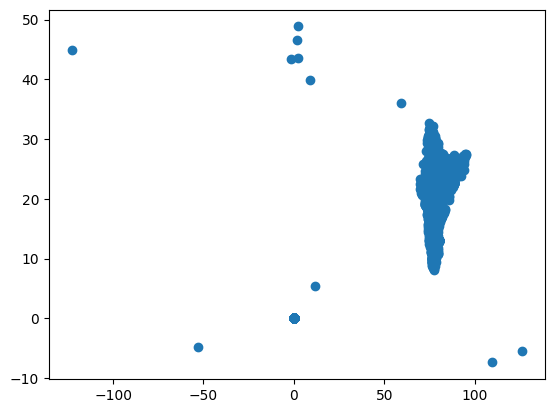

In [21]:
plt.scatter(x=df_restaurant['Longitude'], y=df_restaurant['Latitude'])

<Axes: xlabel='Latitude', ylabel='Longitude'>

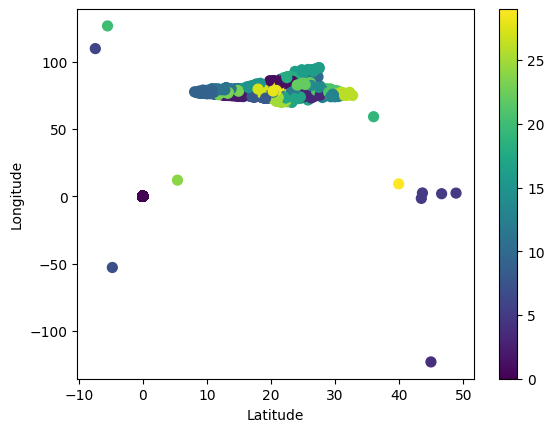

In [23]:
df_restaurant.plot.scatter(x = 'Latitude', y = 'Longitude', c=restaurant_cluster.labels_, s=50, cmap='viridis')

In [24]:
df_restaurant.to_csv('swiggy_with_cluster.csv', index=False)

----

In [2]:
df_places = pd.read_csv('Places.csv')

In [3]:
df_places.head()

,City,Place,Ratings,Distance,Place_desc
0,Manali,1. Capture the Sceneries of Old Manali,3.9,2 km from city center,On the other side of the Manalsu river is a p...
1,Manali,2. Engage in the Adventures of Solang Valley,4.6,8 km from city center,Solang Valley is one of the most popular tour...
2,Manali,3. Jogini Waterfall,4.6,4 km from city center,Jogini Waterfall is located about 3 kilometre...
3,Manali,4. Hadimba Temple,4.4,1 km from city center,"Hadimba temple, away from the hustle and bust..."
4,Manali,5. Rohtang Pass,4.4,16 km from city center,Rohtang pass is the stretch which connects Ma...


In [12]:
df_places[df_places['City'] == 'Manali'].to_dict('records')

[{'City': 'Manali',
  'Place': ' 1. Capture the Sceneries of Old Manali ',
  'Ratings': 3.9,
  'Distance': ' 2 km  from city center ',
  'Place_desc': ' On the other side of the Manalsu river is a part of Manali, time left behind. With a sweet scent of an old world charm, interspersed with guesthouses and an increasing presence of tourism and hints of the present that it brings along, Old Manali is a tiny shift in the world and its rush, one must experience while here. '},
 {'City': 'Manali',
  'Place': ' 2. Engage in the Adventures of Solang Valley ',
  'Ratings': 4.6,
  'Distance': ' 8 km  from city center ',
  'Place_desc': ' Solang Valley is one of the most popular tourist destinations in Himachal Pradesh. It is popular for adventure sports. During winters, Solang valley is covered with snow making skiing is a popular sport here. There are training institutes and trainers located to supervise skiers and train beginners.  '},
 {'City': 'Manali',
  'Place': ' 3. Jogini Waterfall ',
 

In [5]:
df = pd.read_csv('city_with_geopoint.csv')

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 10, init ='k-means++')
kmeans.fit(df[['Latitude', 'Longitude']]) # Compute k-means clustering.
df['cluster_label'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df[['Latitude', 'Longitude']]) # Labels of each point
df.head()

d:\Users\User\anaconda3\envs\palm\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\User\anaconda3\envs\palm\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,City,Ratings,Latitude,Longitude,Ideal_duration,Best_time_to_visit,City_desc,cluster_label
0,Manali,4.5,32.263094,77.188122,2-4,October-June,[' One of the most popular hill stations in Hi...,2
1,Leh Ladakh,4.6,34.164203,77.584813,5-7,JulyOctober,"["" Ladakh is a union territory in the Kashmir ...",2
2,Coorg,4.2,12.936334,77.615118,2-3,September-June,[' Located amidst imposing mountains in Karnat...,6
3,Andaman,4.5,10.000105,93.000019,4-6,October-March,[' Replete with turquoise blue water beaches a...,8
4,Lakshadweep,4.0,10.813249,73.680462,4-6,September-February,"["" Formerly known as Laccadive Islands, Laksha...",6


In [9]:
df.to_csv('city_with_cluster.csv', index=False)

In [10]:
import pickle

with open("city_cluster.pkl", "wb") as f:
    pickle.dump(kmeans, f)

In [33]:
df = pd.read_csv('swiggy.csv')

In [7]:
swiggy_cities = list(df['city'].unique())
len(swiggy_cities)

821

In [20]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
   

longitude = []
latitude = []

def findGeocode(city):

    try:
        geolocator = Nominatim(user_agent="your_app_name")
          
        return geolocator.geocode(city)
      
    except GeocoderTimedOut:
          
        return findGeocode(city)    
  
for i in swiggy_cities[:808]:
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
        print(i, loc.latitude, loc.longitude)
        latitude.append({i: loc.latitude})
        longitude.append({i: loc.longitude})
       
    else:
        latitude.append({i: 0.00})
        longitude.append({i: 0.00})

Abohar 30.1450543 74.1956597
Adilabad 19.5 78.5
Adityapur 22.792542349999998 86.08551847167897
Adoni 39.913451 9.185837
Agartala 23.8312377 91.2823821
Agra 27.1752554 78.0098161
Vastrapur,Ahmedabad 23.0400861 72.5290418
GOTA,Ahmedabad 23.1091444 72.5536242
Paldi & Ambawadi,Ahmedabad 23.0185556 72.5623329
Ghatlodia,Ahmedabad 23.0848516 72.5303277074631
Bopal,Ahmedabad 23.021704749999998 72.47478547314017
Gandhinagar,Ahmedabad 23.0993792 72.6285593
Naranpura,Ahmedabad 23.0567133 72.5508575
Navrangpura,Ahmedabad 23.0359998 72.5643429
Science City,Ahmedabad 23.077854 72.49479798780331
Maninagar,Ahmedabad 22.9977135 72.6067174
Chandkheda,Ahmedabad 23.1100643 72.5811205
Ahmednagar 19.162772500000003 74.85802430085195
Aizawl 23.7435236 92.7382905
Ajmer 26.4691 74.639
Akola 20.76181225 77.1921156663574
Alappuzha 9.5006651 76.41241428564258
Aligarh 27.833333 78.166667
Alipurduar 26.4851573 89.5246926
Allahabad 25.4381302 81.8338005
Alwar 27.5 76.5
Ambala 30.3843674 76.770421
Ambikapur 23.122634

In [22]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
   

longitude2 = []
latitude2 = []

def findGeocode(city):

    try:
        geolocator = Nominatim(user_agent="your_app_name")
          
        return geolocator.geocode(city)
      
    except Exception:
          
        return None   
  
for i in swiggy_cities[808:]:
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
        print(i, loc.latitude, loc.longitude)
        latitude2.append({i: loc.latitude})
        longitude2.append({i: loc.longitude})
       
    else:
        latitude2.append({i: 0.00})
        longitude2.append({i: 0.00})

Gajuwaka,Vizag 17.6650102 83.2126578
MVP Colony,Vizag 17.7422648 83.3356865
Vizianagaram 18.1120819 83.4052196224888
Vyara 21.1176744 73.3857702
Waidhan 24.0794559 82.5731214
Warangal 17.9820644 79.5970954
Wardha 20.82562315 78.61314549522919
Washim 20.287417750000003 77.23696550258964
Yamuna-nagar 19.1481254 72.827599
Yavatmal 20.325703750000002 78.11691396684715


In [23]:
latitude =  latitude + latitude2
longitude = longitude + longitude2

In [35]:
for items in latitude:
    for key, value in items.items():
        # get all record from db where city == key
        df.loc[df['city'] == key, 'Latitude'] = value

In [37]:
for items in longitude:
    for key, value in items.items():
        # get all record from db where city == key
        df.loc[df['city'] == key, 'Longitude'] = value

In [49]:
df.to_csv('swiggy_with_geopoint.csv', index=False)

In [7]:
df = pd.read_csv('swiggy_with_cluster.csv')

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 200, init ='k-means++')
kmeans.fit(df[['Latitude', 'Longitude']]) # Compute k-means clustering.
df['cluster_label'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])
# centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
# labels = kmeans.predict(df[['Latitude', 'Longitude']]) # Labels of each point
df.tail()

d:\Users\User\anaconda3\envs\palm\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\User\anaconda3\envs\palm\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu,Latitude,Longitude,cluster_label
148536,553122,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json,20.325704,78.116914,78
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json,20.325704,78.116914,78
148538,559435,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json,20.325704,78.116914,78
148539,418989,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json,20.325704,78.116914,78
148540,447770,Lazeez kitchen,Yavatmal,--,Too Few Ratings,₹ 200,Pizzas,21521251000634,https://www.swiggy.com/restaurants/lazeez-kitc...,"Lazeez kitchen, 94G3+2RR, Wadgaon, Yavatmal, M...",Menu/447770.json,20.325704,78.116914,78


In [9]:
df.to_csv('swiggy_with_cluster.csv', index=False)

In [10]:
import pickle

with open("restaurant_cluster.pkl", "wb") as f:
    pickle.dump(kmeans, f)

In [3]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
   
def findGeocode(city):

    try:
        geolocator = Nominatim(user_agent="your_app_name")
          
        loc = geolocator.geocode(city)
        return loc.latitude, loc.longitude
      
    except GeocoderTimedOut:
          
        return findGeocode(city)

loc = findGeocode("Attavar, Mangalore")
print("Latitude = {}, Longitude = {}".format(loc.latitude, loc.longitude))

Latitude = 12.860548, Longitude = 74.8480626
